In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/purchase.csv")
df

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,15624510,Male,19,19000,0
1,2,15810944,Male,35,20000,0
2,3,15668575,Female,26,43000,0
3,4,15603246,Female,27,57000,0
4,5,15804002,Male,19,76000,0
...,...,...,...,...,...,...
395,396,15691863,Female,46,41000,1
396,397,15706071,Male,51,23000,1
397,398,15654296,Female,50,20000,1
398,399,15755018,Male,36,33000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       400 non-null    int64 
 1   User ID          400 non-null    int64 
 2   Gender           400 non-null    object
 3   Age              400 non-null    int64 
 4   EstimatedSalary  400 non-null    int64 
 5   Purchased        400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [3]:
# make dummy variable
df['male'] = pd.get_dummies(df['Gender'], drop_first = True)
# drop irrelevant columns
df.drop(columns= ['Unnamed: 0', 'User ID', 'Gender'], inplace = True)

In [4]:
# inspect outcome variable
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
# prepara data for scikit learn 
X = df.drop(columns=['Purchased'])
y = df.Purchased

In [6]:
# make data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [7]:
# create new training dataset for data exploration
train_dataset = pd.DataFrame(X_train).copy()
train_dataset['Purchased'] = pd.DataFrame(y_train)

train_dataset

,Age,EstimatedSalary,male,Purchased
39,27,31000,0,0
167,35,71000,0,0
383,49,28000,1,1
221,35,91000,1,1
351,37,75000,1,0
...,...,...,...,...
255,52,90000,0,1
72,20,23000,0,0
396,51,23000,1,1
235,46,79000,1,1


In [8]:
train_dataset.groupby(by=['Purchased']).describe().T

Purchased                          0              1
Age             count     185.000000      95.000000
                mean       32.621622      45.821053
                std         7.957603       8.756735
                min        18.000000      27.000000
                25%        27.000000      39.000000
                50%        33.000000      47.000000
                75%        38.000000      52.500000
                max        59.000000      60.000000
EstimatedSalary count     185.000000      95.000000
                mean    58556.756757   89505.263158
                std     22429.073482   43284.038059
                min     15000.000000   20000.000000
                25%     43000.000000   43500.000000
                50%     60000.000000   97000.000000
                75%     75000.000000  130000.000000
                max    134000.000000  150000.000000
male            count     185.000000      95.000000
                mean        0.518919       0.452632
                std         0.500998       0.500392
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         1.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

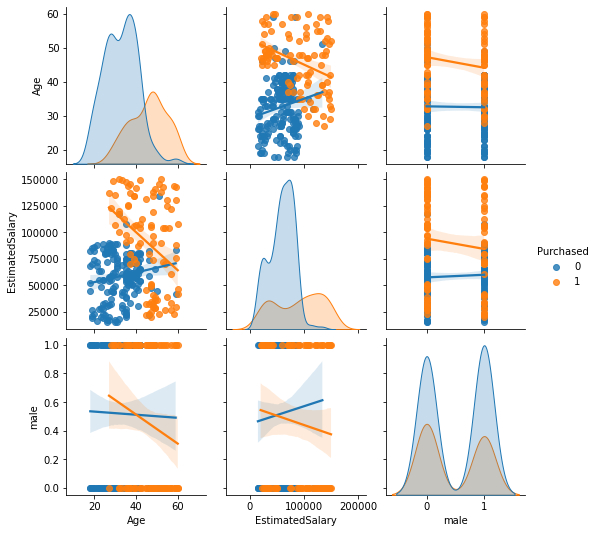

In [9]:
import seaborn as sns

sns.pairplot(hue='Purchased', kind="reg", diag_kind="kde", data=train_dataset);

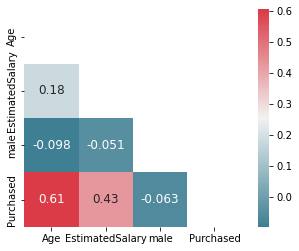

In [10]:
import numpy as np

# Calculate correlation using the default method ( "pearson")
corr = train_dataset.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});

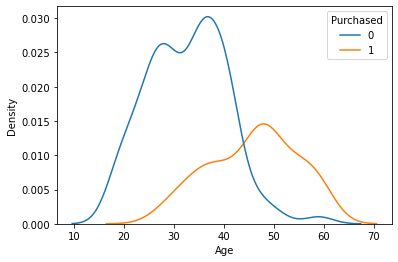

In [11]:
sns.kdeplot(hue="Purchased", x='Age', data=train_dataset);

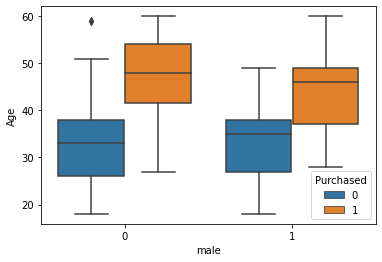

In [12]:
sns.boxplot(x="male", y="Age", hue="Purchased", data=train_dataset);

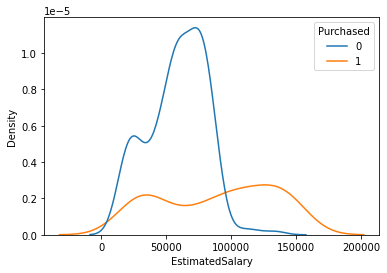

In [13]:
sns.kdeplot(hue="Purchased", x='EstimatedSalary', data=train_dataset); 

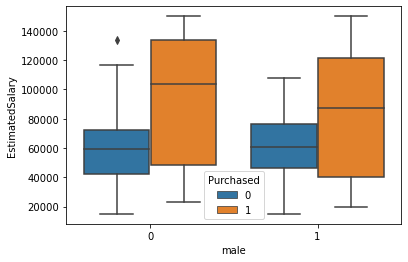

In [14]:
sns.boxplot(x="male", y="EstimatedSalary", hue="Purchased", data=train_dataset);

In [15]:
# only use meaningful predictors
features_model = ['Age', 'EstimatedSalary']

X_train = X_train[features_model] 
X_test = X_test[features_model]

In [16]:
import sklearn.linear_model as skl_lm

# model
clf = skl_lm.LogisticRegressionCV(penalty='l2')
# prediction
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [17]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.7833333333333333

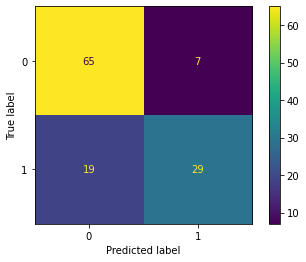

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.77      0.90      0.83        72
         Yes       0.81      0.60      0.69        48

    accuracy                           0.78       120
   macro avg       0.79      0.75      0.76       120
weighted avg       0.79      0.78      0.78       120



In [20]:
pred_proba = clf.predict_proba(X_test)

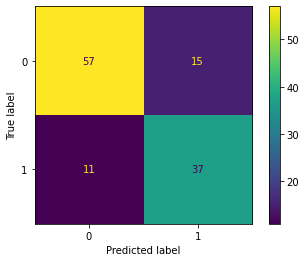

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        72
           1       0.71      0.77      0.74        48

    accuracy                           0.78       120
   macro avg       0.77      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120



In [21]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .4})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))

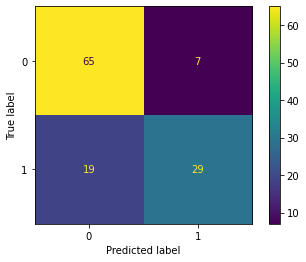

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        72
           1       0.81      0.60      0.69        48

    accuracy                           0.78       120
   macro avg       0.79      0.75      0.76       120
weighted avg       0.79      0.78      0.78       120



In [22]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .5})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))

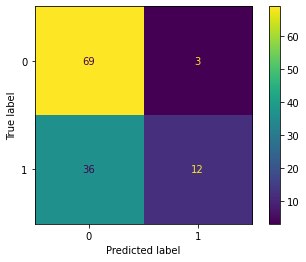

              precision    recall  f1-score   support

           0       0.66      0.96      0.78        72
           1       0.80      0.25      0.38        48

    accuracy                           0.68       120
   macro avg       0.73      0.60      0.58       120
weighted avg       0.71      0.68      0.62       120



In [23]:
df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .7})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, df_['y_pred']))